In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
file_path = './creditcard.csv'
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
Not_fraud =df[df.Class==0]
fraud = df[df.Class==1]
Not_fraud.head()
Not_fraud_resample= Not_fraud.sample(492)
new_df=pd.concat([Not_fraud_resample,fraud],axis=0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
133987,80597.0,-0.172759,1.001487,1.996028,1.358975,0.229580,0.048587,0.698128,-0.187546,-0.759004,...,-0.195534,-0.328104,-0.125919,0.068537,0.058565,-0.344552,-0.094758,-0.210948,9.99,0
85905,60992.0,1.221239,0.467657,-0.377700,0.777814,-0.094607,-1.232573,0.215622,-0.114856,-0.249628,...,-0.086873,-0.290770,-0.051856,0.415669,0.473096,0.342664,-0.045436,0.025939,0.76,0
213984,139480.0,1.968154,-0.305249,0.094774,2.016019,-0.872017,-0.224933,-0.827275,0.098000,0.257596,...,0.124827,0.411645,0.271667,0.124328,-0.714411,2.331494,-0.162165,-0.069697,3.79,0
139551,83208.0,-1.249951,0.597260,2.107010,0.849651,-0.386360,2.112547,-0.347288,1.214044,-0.155924,...,0.252319,0.673682,0.114307,-0.990864,-0.067631,-0.135208,0.037607,0.020324,94.19,0
122708,76659.0,1.212207,-0.055576,0.635906,0.903026,-0.721853,-0.599432,-0.187505,-0.063050,0.718640,...,-0.111976,-0.114785,-0.066948,0.427878,0.529893,0.412559,-0.018080,0.011840,11.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
# Assuming `new_df` is already defined and contains your resampled data

# Separate features and target
X = new_df.drop('Class', axis=1)  # Features
y = new_df['Class']               # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find number of components explaining 95% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # +1 because index starts from 0

print(f"Number of components explaining 95% variance: {n_components}")

# Re-apply PCA with selected number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Optionally, print the cumulative explained variance ratio for verification
print("Cumulative explained variance ratio:", cumulative_variance_ratio[:n_components])

print("Covariance Matrix:\n", pca.get_covariance(), '\n')
print('\nEigenvalues:', pca.explained_variance_)


Number of components explaining 95% variance: 17
Cumulative explained variance ratio: [0.38019495 0.47901951 0.54902151 0.60391737 0.6556478  0.69923471
 0.73708109 0.7719161  0.80310394 0.83145446 0.85821896 0.8809774
 0.90170709 0.91878459 0.93343124 0.94642119 0.9570822 ]
Covariance Matrix:
 [[ 1.00101729e+00  2.21256347e-01 -2.05699753e-01  1.45955305e-01
  -2.04531932e-01  2.80706302e-01  1.29868987e-01  2.07167370e-01
  -1.37335780e-01  1.64068478e-01  2.09849811e-01 -3.15868927e-01
   2.55335748e-01 -1.13749087e-01  1.68896478e-01 -1.36330621e-01
   2.16825129e-01  2.35221620e-01  2.60217651e-01 -8.55833465e-02
  -4.74413567e-02 -6.07151072e-02  1.40950090e-01  6.15499966e-02
  -4.08297606e-02 -2.19701850e-01 -7.35830880e-02 -1.40914530e-01
   3.41631947e-03  1.10075335e-03]
 [ 2.21256347e-01  1.00101729e+00 -8.19545884e-01  8.85354499e-01
  -6.07978544e-01  8.68920982e-01  3.31997274e-01  8.84434732e-01
  -7.98434059e-02  6.56945417e-01  7.36079861e-01 -5.37769175e-01
   5.9940

In [ ]:
print("Explained Variance Ratios:", pca.explained_variance_ratio_, '\n')

total_explained_variances = []
for i in range(len(pca.explained_variance_ratio_)):
  total_explained_variances.append(sum(pca.explained_variance_ratio_[:i + 1]))
  print('Total explained variance including', i + 1, 'components:', total_explained_variances[-1])
  print('We', 'should use more components' if total_explained_variances[-1] < 0.95 else 'do not need to use more components.', '\n')

Explained Variance Ratios: [3.80194949e-01 9.88245640e-02 7.00020012e-02 5.48958535e-02
 5.17304351e-02 4.35869058e-02 3.78463803e-02 3.48350113e-02
 3.11878422e-02 2.83505151e-02 2.67645059e-02 2.27584339e-02
 2.07296911e-02 1.70774965e-02 1.46466595e-02 1.29899495e-02
 1.06610035e-02 8.25156617e-03 7.69579861e-03 5.89015268e-03
 4.13893727e-03 3.72291086e-03 3.07379339e-03 2.48072086e-03
 1.97188333e-03 1.79708976e-03 1.44347912e-03 1.30948904e-03
 8.96375602e-04 2.45605772e-04] 

Total explained variance including 1 components: 0.3801949493956106
We should use more components 

Total explained variance including 2 components: 0.47901951344381855
We should use more components 

Total explained variance including 3 components: 0.5490215146482567
We should use more components 

Total explained variance including 4 components: 0.6039173681952283
We should use more components 

Total explained variance including 5 components: 0.6556478032791061
We should use more components 

Total expla

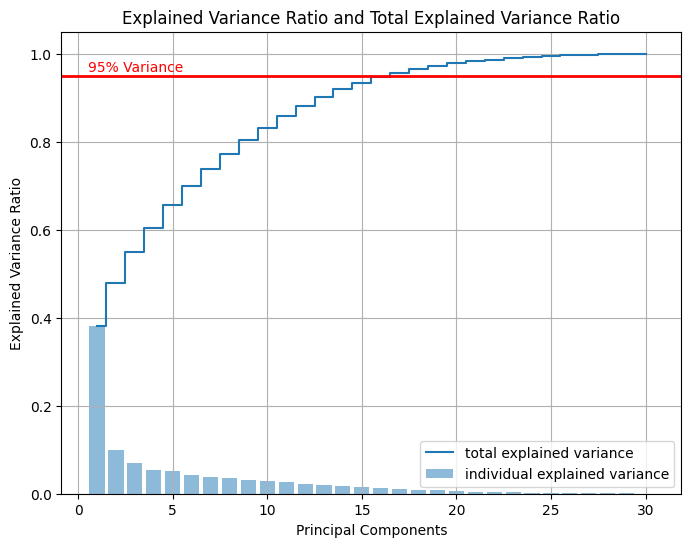

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(total_explained_variances) + 1), total_explained_variances, where='mid', label='total explained variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('Explained Variance Ratio and Total Explained Variance Ratio')

plt.axhline(y=0.95, color='r', linestyle='-', linewidth=2, label='95% cumulative variance')  # Add the horizontal line for 95% variance
plt.text(0.5, 0.96, '95% Variance', color = 'red') # Adding a text label near the line

plt.grid()
plt.show()

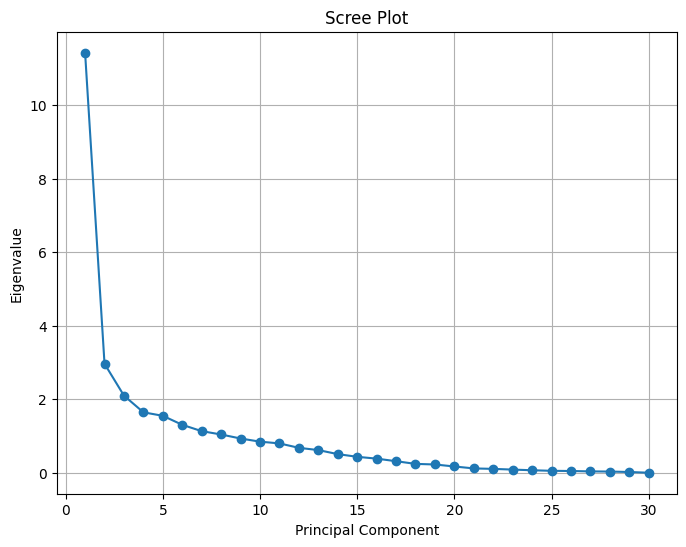

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')

plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')

plt.grid()
plt.show()

In [ ]:
principal_components_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

final_df = pd.concat([principal_components_df, y.reset_index(drop=True)], axis=1)

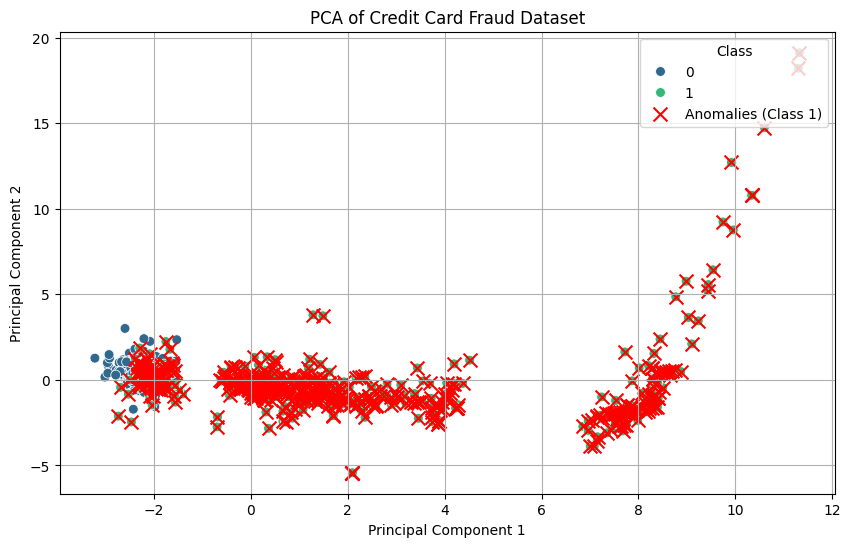

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for all data points
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=50)

# Highlight anomalies (class 1)
anomaly_color = 'red'  # Color for anomalies
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color=anomaly_color, label='Anomalies (Class 1)', s=100, marker='x')

plt.title('PCA of Credit Card Fraud Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.grid(True)
plt.show()


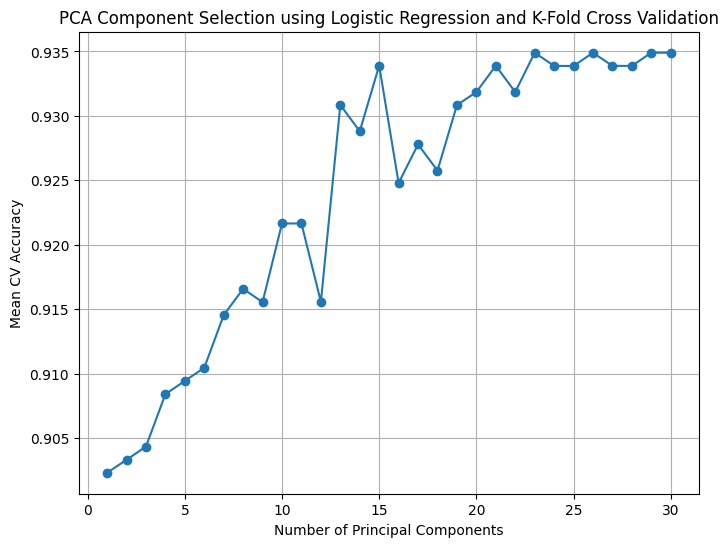

Optimal number of principal components: 23
Mean CV scores for each number of components: [0.9023191094619666, 0.9033189033189034, 0.9043496186353328, 0.9084106369820656, 0.9094413522984951, 0.9104617604617603, 0.9145433931148219, 0.9165842094413523, 0.9155534941249227, 0.921655328798186, 0.921655328798186, 0.9155741084312513, 0.9308493094207378, 0.9288084930942073, 0.9339002267573695, 0.924788703360132, 0.9277880849309421, 0.9257575757575758, 0.9308390022675737, 0.9318491032776747, 0.9338899196042053, 0.9318491032776747, 0.9349000206143063, 0.9338796124510411, 0.9338693052978767, 0.9349000206143063, 0.9338796124510411, 0.9338796124510411, 0.9349000206143063, 0.9349000206143063]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming principal_components_df is part of final_df
principal_components_df = final_df.drop(columns=['Class'])  # Adjust 'Class' to your actual label column name
labels = final_df['Class']

# Validate logistic regression models with increasing number of principal components
mean_scores = []
for n_components in range(1, principal_components_df.shape[1] + 1):

    logistic_regression = LogisticRegression(max_iter=1000)
    scores = cross_val_score(logistic_regression, principal_components_df.iloc[:, 0:n_components], labels, cv=10)
    mean_scores.append(scores.mean())

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, principal_components_df.shape[1] + 1), mean_scores, marker='o')

plt.xlabel('Number of Principal Components')
plt.ylabel('Mean CV Accuracy')
plt.title('PCA Component Selection using Logistic Regression and K-Fold Cross Validation')

plt.grid()
plt.show()

# Print the optimal number of components based on CV score
optimal_components = np.argmax(mean_scores) + 1
print(f"Optimal number of principal components: {optimal_components}")

# Display the scores for reference
print(f"Mean CV scores for each number of components: {mean_scores}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming final_df contains the PCA components and the target variable y
X = final_df.drop('Class', axis=1)  # Drop the target variable 'Class'
y = final_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[104   0]
 [  4  29]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       104
         1.0       1.00      0.88      0.94        33

    accuracy                           0.97       137
   macro avg       0.98      0.94      0.96       137
weighted avg       0.97      0.97      0.97       137



In [ ]:
# Get the coefficients of the logistic regression model
coefficients = logreg.coef_[0]

# Map coefficients to their corresponding feature names
feature_names = X.columns

# Pair coefficients with their respective feature names
feature_coefficients = list(zip(feature_names, coefficients))

# Sort features by their coefficients (absolute values) in descending order
feature_coefficients.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the top features
print("Top 5 Most Important Features:")
for feature, coef in feature_coefficients[:5]:
    print(f"{feature}: {coef:.4f}")


Top 5 Most Important Features:
PC1: 2.0864
PC11: 1.6115
PC19: 1.5636
PC2: -1.2366
PC3: -1.2078


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = './creditcard.csv'
basicdf = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(basicdf.head())

# Impute missing values with mean (you can choose another strategy based on your data)
imputer = SimpleImputer(strategy='mean')
basicdf_imputed = pd.DataFrame(imputer.fit_transform(basicdf), columns=basicdf.columns)

# Assuming you have a target variable named 'Class' and features in other columns
X = basicdf_imputed.drop('Class', axis=1)  # Features
y = basicdf_imputed['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Epoch 1/100
20/20 [==============================] - 2s 18ms/step - loss: 0.6644 - accuracy: 0.5294 - val_loss: 0.6307 - val_accuracy: 0.5886
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5795 - accuracy: 0.7202 - val_loss: 0.5560 - val_accuracy: 0.7468
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4926 - accuracy: 0.8251 - val_loss: 0.4725 - val_accuracy: 0.8418
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4013 - accuracy: 0.8839 - val_loss: 0.3873 - val_accuracy: 0.8734
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3172 - accuracy: 0.9173 - val_loss: 0.3132 - val_accuracy: 0.8924
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2459 - accuracy: 0.9300 - val_loss: 0.2566 - val_accuracy: 0.9177
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1993 - accuracy: 0.9412 - val_loss: 0.2265 - val_accuracy: 0.9241
Epoch 8/100


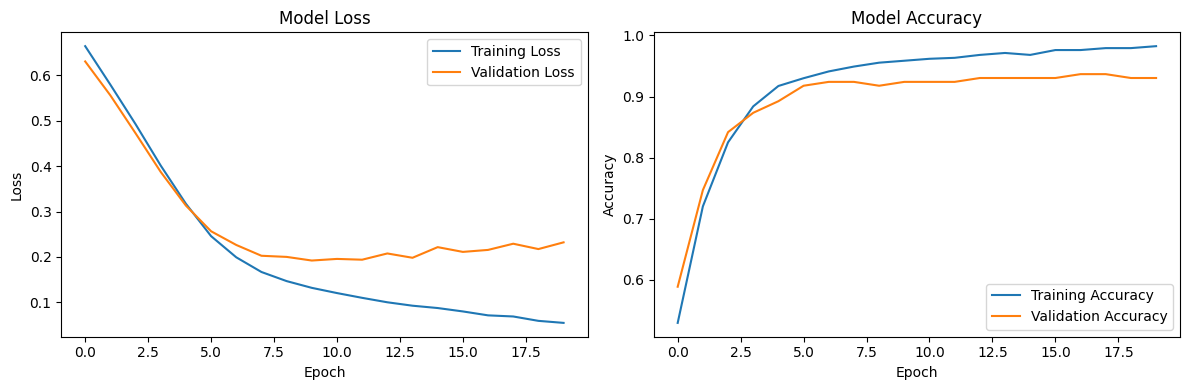

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(
    principal_components_df.iloc[:, :optimal_components],
    labels,
    test_size=0.2,
    random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(optimal_components,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()